In [3]:
import pickle

with open('stair_function/results/no_overlap/quantised_results.pkl', 'rb') as f:
    results = pickle.load(f)

results

{'fp32': {'train': {10: 8.349015923059255e-12,
   50: 3.156519142066827e-06,
   100: 1.978212651465583e-07,
   200: 5.687686552846571e-07,
   300: 2.2536474075796065e-10,
   400: 3.419304006602175e-10,
   500: 3.830096795276461e-10,
   800: 9.260871514094049e-10,
   1000: 2.0229655728343232e-09,
   5000: 2.7942871383856982e-05,
   10000: 0.000338361511239782,
   20000: 0.0001726993068587035},
  'test': {10: 8.301294326782227,
   50: 7.944671154022217,
   100: 8.324244499206543,
   200: 6.257056713104248,
   300: 5.995537281036377,
   400: 5.3089141845703125,
   500: 5.029645919799805,
   800: 4.274215221405029,
   1000: 4.056771755218506,
   5000: 2.025923252105713,
   10000: 1.5283782482147217,
   20000: 0.8291723132133484}},
 'fp16': {'train': {10: 0.0,
   50: 3.874301910400391e-06,
   100: 4.76837158203125e-07,
   200: 8.940696716308594e-07,
   300: 2.980232238769531e-07,
   400: 5.960464477539062e-07,
   500: 5.960464477539062e-07,
   800: 8.344650268554688e-07,
   1000: 8.94069671

In [6]:
import matplotlib.pyplot as plt

n_train_sizes = [10, 50, 100, 200, 300, 400, 500, 800, 1000, 5000, 10000, 20000]

train_results = {
    'fp32': [results['fp32']['train'][n] for n in n_train_sizes],
    'fp16': [results['fp16']['train'][n] for n in n_train_sizes],
    'int8_wo': [results['int8_wo']['train'][n] for n in n_train_sizes],
    'int8_dyn': [results['int8_dyn']['train'][n] for n in n_train_sizes],
    'int4_wo': [results['int4_wo']['train'][n] for n in n_train_sizes],
}

test_results = {
    'fp32': [results['fp32']['test'][n] for n in n_train_sizes],
    'fp16': [results['fp16']['test'][n] for n in n_train_sizes],
    'int8_wo': [results['int8_wo']['test'][n] for n in n_train_sizes],
    'int8_dyn': [results['int8_dyn']['test'][n] for n in n_train_sizes],
    'int4_wo': [results['int4_wo']['test'][n] for n in n_train_sizes],
}

In [7]:

def plot_dict_of_lists(data_dict, x_values=None, xlabel='X-axis', ylabel='Y-axis',
                       title='Plot', log_x=False, log_y=False):
    """
    Plots a dictionary of lists with a custom x-axis and optional logarithmic scaling.

    Args:
        data_dict (dict): Dictionary where keys are labels and values are lists of equal length.
        x_values (list or None): Optional list of x-axis values (same length as the lists in the dict).
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
        log_x (bool): Whether to use a logarithmic scale for the x-axis.
        log_y (bool): Whether to use a logarithmic scale for the y-axis.
    """
    plt.figure(figsize=(10, 6))  # Set figure size

    # Default x-axis if none provided
    if x_values is None:
        x_values = range(len(next(iter(data_dict.values()))))  # Default to indices

    # Plot each key-value pair
    for label, values in data_dict.items():
        plt.plot(x_values, values, label=label)  # Line plot without markers

    # Set axes scaling if specified
    if log_x:
        plt.xscale('log')
    if log_y:
        plt.yscale('log')

    # Add labels, title, and legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='best')  # Place legend in the best location

    # Add grid for readability
    plt.grid(True, linestyle='--', alpha=0.6)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

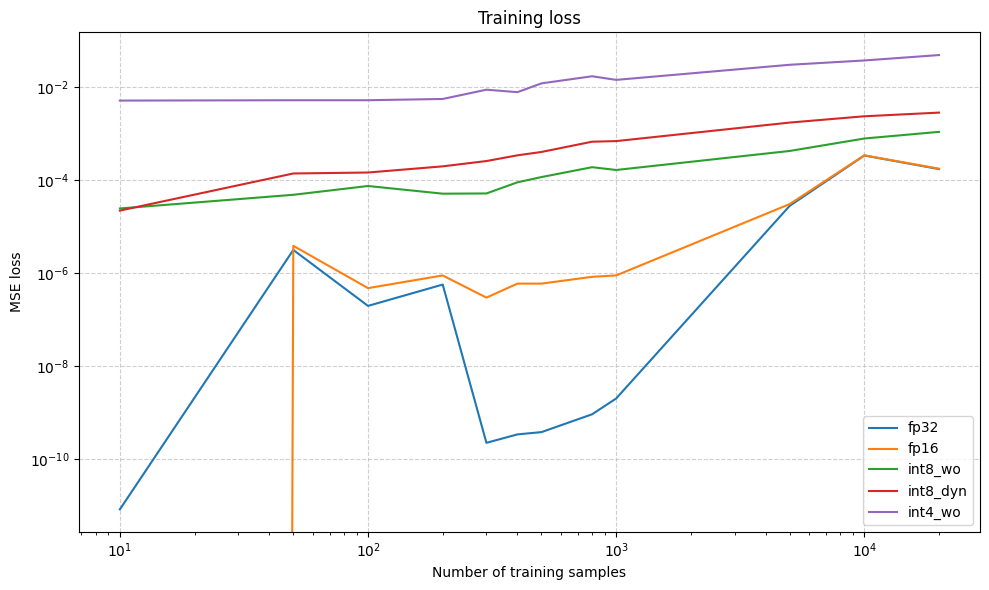

In [12]:
plot_dict_of_lists(train_results, x_values=n_train_sizes, xlabel='Number of training samples', ylabel='MSE loss', title='Training loss', log_x=True, log_y=True)

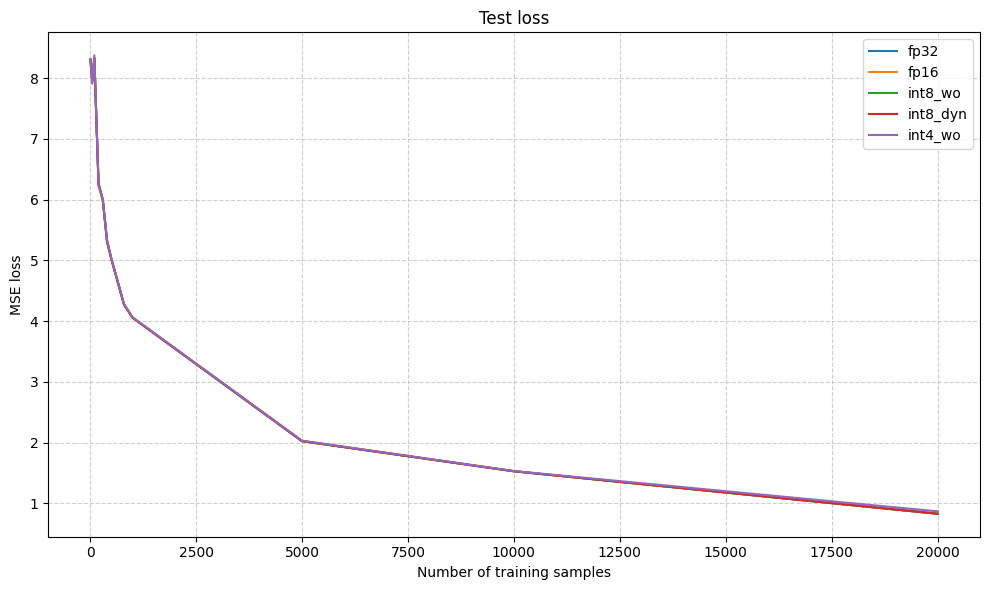

In [14]:
plot_dict_of_lists(test_results, x_values=n_train_sizes, xlabel='Number of training samples', ylabel='MSE loss', title='Test loss')

In [15]:
percent_diff_train = {
    'fp16': [(train_results['fp16'][i] - train_results['fp32'][i]) / train_results['fp32'][i] * 100 for i in range(len(n_train_sizes))],
    'int8_wo': [(train_results['int8_wo'][i] - train_results['fp32'][i]) / train_results['fp32'][i] * 100 for i in range(len(n_train_sizes))],
    'int8_dyn': [(train_results['int8_dyn'][i] - train_results['fp32'][i]) / train_results['fp32'][i] * 100 for i in range(len(n_train_sizes))],
    'int4_wo': [(train_results['int4_wo'][i] - train_results['fp32'][i]) / train_results['fp32'][i] * 100 for i in range(len(n_train_sizes))],
}

percent_diff_test = {
    'fp16': [(test_results['fp16'][i] - test_results['fp32'][i]) / test_results['fp32'][i] * 100 for i in range(len(n_train_sizes))],
    'int8_wo': [(test_results['int8_wo'][i] - test_results['fp32'][i]) / test_results['fp32'][i] * 100 for i in range(len(n_train_sizes))],
    'int8_dyn': [(test_results['int8_dyn'][i] - test_results['fp32'][i]) / test_results['fp32'][i] * 100 for i in range(len(n_train_sizes))],
    'int4_wo': [(test_results['int4_wo'][i] - test_results['fp32'][i]) / test_results['fp32'][i] * 100 for i in range(len(n_train_sizes))],
}

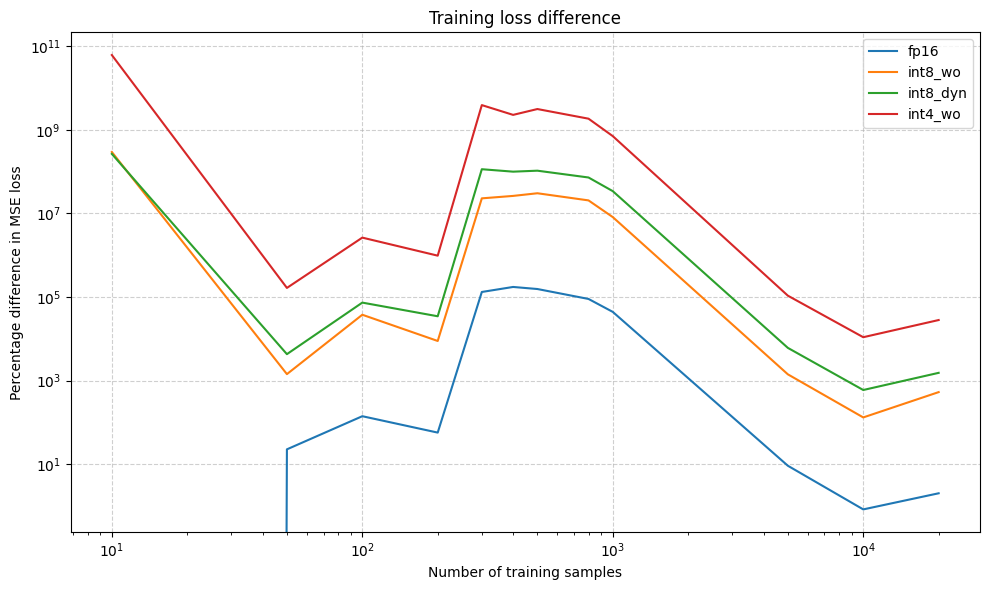

In [23]:
plot_dict_of_lists(percent_diff_train, x_values=n_train_sizes, xlabel='Number of training samples', ylabel='Percentage difference in MSE loss', title='Training loss difference', log_x=True, log_y=True)

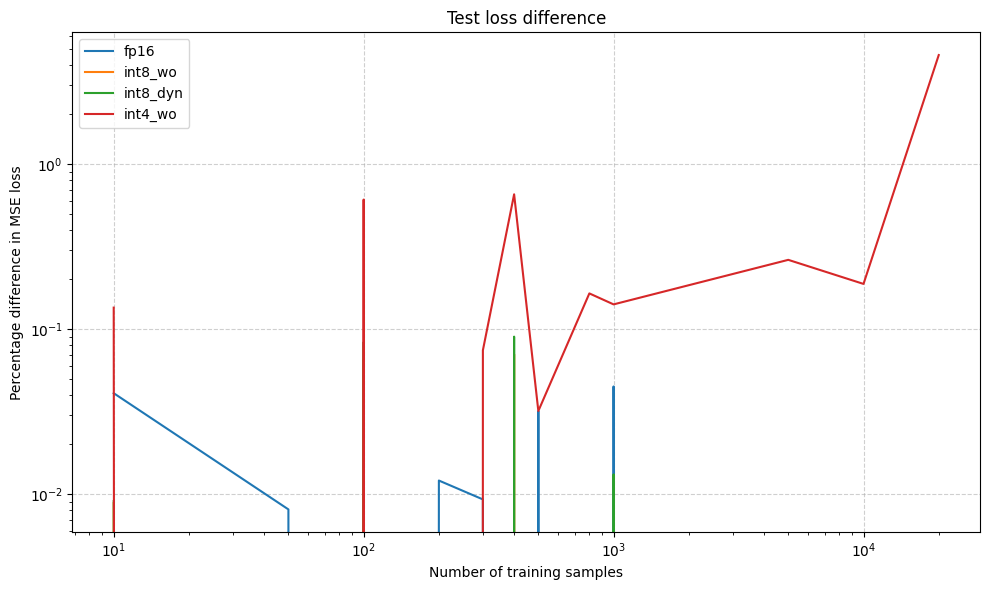

In [24]:
plot_dict_of_lists(percent_diff_test, x_values=n_train_sizes, xlabel='Number of training samples', ylabel='Percentage difference in MSE loss', title='Test loss difference', log_x=True, log_y=True)

In [21]:
(train_results['int4_wo'][1] - train_results['fp32'][1])/train_results['fp32'][1] * 100

165224.70181562164

In [25]:
print(n_train_sizes)
print(percent_diff_train)

[10, 50, 100, 200, 300, 400, 500, 800, 1000, 5000, 10000, 20000]
{'fp16': [-100.0, 22.739693188224212, 141.04443870068994, 57.19390710505938, 132140.39522536797, 174218.06198075044, 155521.77135810035, 90006.53323345464, 44095.990462566406, 9.214180982955334, 0.8320909326352895, 2.0220249640076693], 'int8_wo': [294379690.2933794, 1432.5573645933684, 37707.26629643875, 8890.534609435808, 22934996.480432797, 26239200.75636351, 30367366.738167476, 20488682.23057462, 8166208.383034449, 1415.5875669422167, 131.859520542425, 531.6385690834514], 'int8_dyn': [265132230.92269078, 4302.013179453468, 73572.98025334555, 34670.72682433656, 114102401.4934134, 99757428.45506915, 105232094.06555861, 72343541.76584855, 34110647.418635406, 6077.482938799444, 596.9251453615268, 1537.602906552399], 'int4_wo': [61407873261.93481, 165224.70181562164, 2637890.3371403506, 976430.4693118569, 3899927843.670372, 2275896517.220678, 3139326769.2526865, 1845381700.6211507, 706004330.0452209, 107803.61081115986, 109

In [27]:
print(percent_diff_test)

{'fp16': [0.04087523082787392, 0.008072656065298604, -0.04723550836256386, 0.012078952299874433, 0.009281386096674504, -0.00603578357404613, 0.03189250746023012, -0.01819565381580487, 0.044912430164462246, -0.026290586534276968, -0.0037906660075379657, -0.00853269124172798], 'int8_wo': [0.008811495796790135, -0.06323080419919762, 0.06493593533810622, -0.004389575094465409, -0.020097740073947278, 0.0704264568513329, -0.016998592709926458, -0.04907583147500039, -0.0396348376117683, -0.18505795579745093, -0.11874300267234153, -0.2223531638493091], 'int8_dyn': [0.009064237527597673, -0.08618835769344829, 0.08346123658046997, -0.00010669106132381202, -0.017369791975267453, 0.09000682618380398, -0.0780626951330365, -0.03218544528424099, 0.01316459612253277, -0.09274669314084011, -0.0601124751442286, -0.17159551190504518], 'int4_wo': [0.1349870607722087, -0.4836091170716989, 0.6097310188125179, -0.612216172246317, 0.07443401240683521, 0.6561758999784437, 0.03189250746023012, 0.164586438224751